In [1]:
from analysis import *

file_paths = {0: 'single_classification_22/45540945/',
              1: 'single_classification_42/45539118/', 
              2: 'single_regression_2/45540957/',
              3: 'single_regression_11/45540958/'}

number = 20

evaluations = {0: 'train prec', 1: 'train roc', 2: 'train bedroc',
               3: 'val prec', 4: 'val roc', 5: 'val bedroc',
               6: 'test prec', 7: 'test roc', 8: 'test bedroc',
               9: 'EF_2', 10: 'EF_1', 11: 'EF_015', 12: 'EF_01'}

paths = ['../../output/cross_validation/{}'.format(p) for p in file_paths.values()]
model_list = ['single_classification_22', 'single_classification_42', 'single_regression_2', 'single_regression_11']

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
for k in range(4):
    print 'Check ', file_paths[k]
    check_result_completeness(dir_='../../output/cross_validation/', file_path=file_paths[k], number=number)
    print

Check  single_classification_22/45540945/
All output result complete.

Check  single_classification_42/45539118/
All output result complete.

Check  single_regression_2/45540957/
All output result complete.

Check  single_regression_11/45540958/
All output result complete.



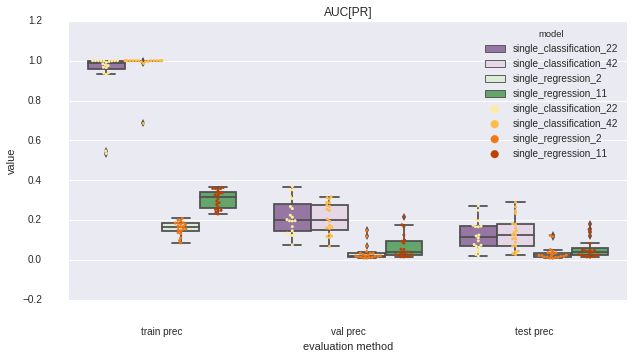

In [5]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list,
                      title='AUC[PR]')

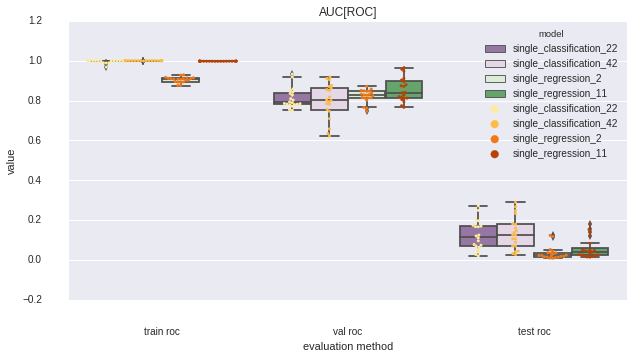

In [6]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list,
                      title='AUC[ROC]')

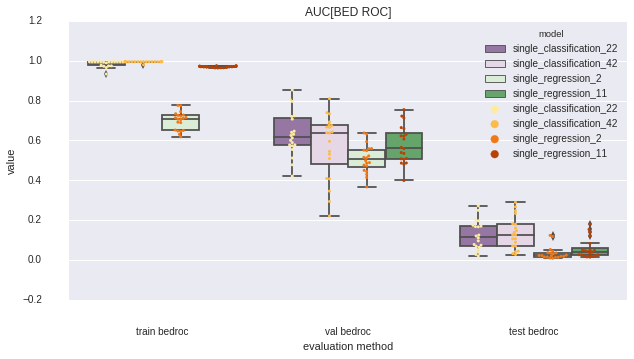

In [7]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list,
                      title='AUC[BED ROC]')

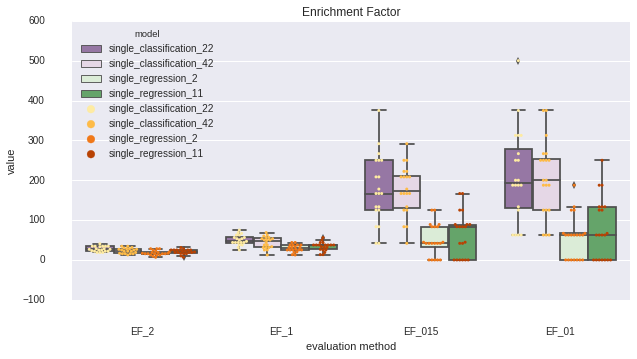

In [8]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list,
                      title='Enrichment Factor')